In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/

# Error as a Function of the Training Set Size

### Define the True Function and Generate the Sample Data

In [2]:
# the true parameters and the function to be estimated

a = 0.79
b = -1.2

def f(x):
    return a * x + b

In [3]:
f_points = pd.DataFrame({'x': np.linspace(-1, 1, 100)})
f_points['y'] = f_points.x.apply(f)

In [4]:
train_size = 100
test_size = 100

train = pd.DataFrame({'x': np.random.uniform(-1, 1, train_size)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

test = pd.DataFrame({'x': np.random.uniform(-1, 1, test_size)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

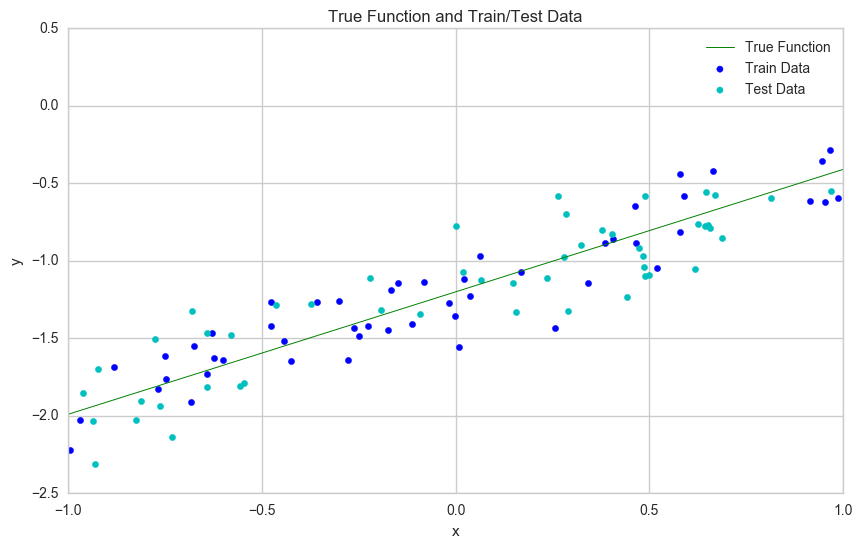

In [5]:
n_plot_points = 50
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7, label='True Function')
_ = plt.scatter(train.x[:n_plot_points], train.y[:n_plot_points], color='b', marker='o', label='Train Data')
_ = plt.scatter(test.x[:n_plot_points], test.y[:n_plot_points], color='c', marker='o', label='Test Data')
_ = plt.xlim((-1, 1))
_ = plt.ylim((-2.5, 0.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Train/Test Data')
_ = plt.legend()

### Compute Error on Different Size Train Sets

In [6]:
def error_by_size(n):
    a, b, _, _, _ = scipy.stats.linregress(train.x[:n], train.y[:n])
    return sklearn.metrics.mean_squared_error(train.y, train.x * a + b)

In [7]:
sample_sizes = range(2, 101)
errors = [error_by_size(n) for n in sample_sizes]

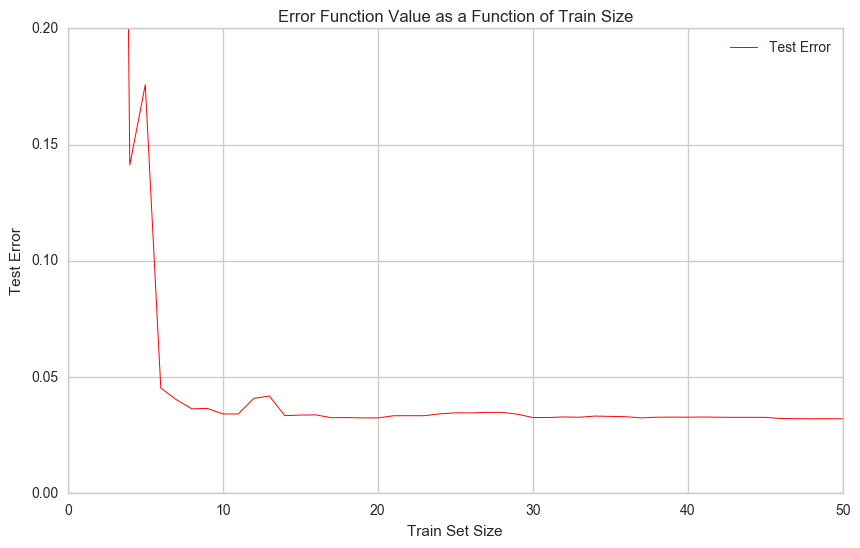

In [8]:
_ = plt.plot(sample_sizes, errors, 'r-', linewidth=0.7, label='Test Error')
_ = plt.xlim((0, 50))
_ = plt.ylim((0, 0.2))
_ = plt.xlabel('Train Set Size')
_ = plt.ylabel('Test Error')
_ = plt.title('Error Function Value as a Function of Train Size')
_ = plt.legend()